# top

https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

read: `pos_weight` in the above link

In [1]:
import os, sys
import pickle
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import sklearn.metrics
import sklearn.linear_model

sys.path.append('..')
import diefComp1Utils as util


/Users/arianprabowo/anaconda3/envs/dief3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folderPath = '/Users/arianprabowo/Library/CloudStorage/OneDrive-UNSW/root/DIEF/raw data/e04_splits/'
pathTrainX = folderPath+'train_X/'
pathTrainY = folderPath+'train_Y.csv'
pathTestX = folderPath+'test_X/'
pathTestY = folderPath+'test_Y.csv'

# load

In [3]:
dfTrainY = pd.read_csv(pathTrainY, index_col=0)
aTrny = dfTrainY.iloc[:,3:].values

In [4]:
aTrny.shape

(31851, 240)

# all

In [5]:
print(1, (aTrny==1).sum())
print(0, (aTrny==0).sum())
print(10, (aTrny>=0).sum())
print(-1, (aTrny==-1).sum())

1 91680
0 77676
10 169356
-1 7474884


In [6]:
7474884 / 169356

44.137107631261955

In [7]:
7474884 / 91680

81.53232984293194

# per class

In [8]:
ar = np.zeros(240)
for i in range(240):
    npos = (aTrny[:,i]>=0).sum()
    nneg = (aTrny[:,i]==-1).sum()
    if npos!=0:
        ar[i] = nneg/npos
ar

array([8.52197309e+00, 2.42785714e+01, 1.09593750e+02, 2.15673469e+02,
       4.60608696e+02, 2.42785714e+01, 4.16385542e+01, 1.23905882e+02,
       0.00000000e+00, 1.76850000e+03, 1.76850000e+03, 1.57990506e+01,
       2.31845103e+01, 1.31712500e+02, 0.00000000e+00, 1.19951040e+01,
       3.78178571e+02, 6.88486842e+01, 6.00172414e+01, 2.39225352e+01,
       2.39225352e+01, 2.20303688e+01, 3.78178571e+02, 0.00000000e+00,
       3.41556291e+01, 1.09593750e+02, 1.59863636e+02, 2.07176471e+02,
       1.04118812e+02, 2.07176471e+02, 1.62338462e+02, 4.81590909e+02,
       1.25392857e+02, 1.84807339e+01, 3.31382637e+01, 5.29850000e+02,
       2.39225352e+01, 2.65325000e+03, 6.18224852e+01, 6.37378049e+01,
       2.80081967e+01, 0.00000000e+00, 1.06160000e+04, 3.34707792e+01,
       2.24893617e+02, 6.62562500e+02, 3.71906475e+01, 1.70561224e+01,
       1.32612500e+03, 1.51571429e+03, 2.34933333e+02, 7.22206897e+01,
       2.15673469e+02, 0.00000000e+00, 8.74750000e+01, 2.65325000e+03,
      

In [9]:
print(ar.max())
print(ar.mean())
print(np.median(ar))

10616.0
436.7866464972475
62.78014504257469


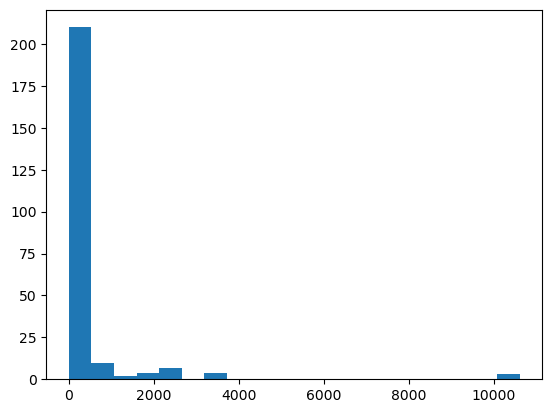

In [10]:
plt.hist(ar,bins=20);

In [11]:
for iar in np.sort(ar):
    print(round(iar))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
4
6
6
6
8
8
9
11
11
11
12
13
15
15
16
16
17
18
18
18
19
19
20
20
20
20
20
21
22
22
23
23
24
24
24
24
24
24
26
26
26
27
28
28
29
30
30
30
32
33
33
33
33
33
33
33
33
34
34
34
34
35
35
35
35
35
36
37
37
37
37
37
37
37
38
40
40
40
40
42
42
42
43
45
45
48
50
52
52
57
58
59
60
60
60
60
60
60
60
62
62
64
64
66
69
72
72
79
80
83
83
87
88
88
94
95
95
97
101
102
102
104
107
108
110
110
112
114
116
124
124
124
125
125
125
125
125
125
130
132
132
137
146
146
149
149
160
160
162
162
170
179
192
207
207
207
216
216
225
235
252
252
278
278
302
311
341
378
378
378
378
407
407
407
424
424
441
461
461
461
461
461
482
482
482
482
482
482
482
530
530
558
663
663
663
663
663
663
663
707
964
1326
1516
1768
1768
1768
1768
2653
2653
2653
2653
2653
2653
2653
3538
3538
3538
3538
10616
10616
10616


# bot